# Load_data

In [2]:
import pandas as pd
import re

In [3]:
df_data = pd.read_csv('data/Clean_tweets/Tesla_label_from_2010-06-29_to_2019-02-26_2019227.csv')
df_data.head()

,created_at,text,"Price_label(0,1)"
0,2010-06-29,RT @elonmusk: Some Tesla news,1
1,2010-06-29,T Trump T Tusk T Tesla 💕,1
2,2010-06-29,RT @nytimesbusiness: Tesla's Elon Musk may be ...,1
3,2010-07-01,"RT @KudoKun_: 테슬라 모델 S가 나무에 부딪혀 불이 났는데, 운전자는 차...",-1
4,2010-07-01,2016: the year that people found out that Tesl...,-1


In [3]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3277 entries, 0 to 3276
Data columns (total 3 columns):
created_at          3277 non-null object
text                3277 non-null object
Price_label(0,1)    3277 non-null int64
dtypes: int64(1), object(2)
memory usage: 76.9+ KB


# Clean DATA

In [4]:
from farhad.TwCleaner import Tweets_preprocesiing, __info_Tweets_preprocesiing__
import warnings
import numpy as np

In [5]:
warnings.filterwarnings('ignore')
save_file = 'data/Clean_tweets/2Tesla_label_from_2010-06-29_to_2019-02-26_2019227.csv'
CT = Tweets_preprocesiing()
data = CT.Cleaner(df_data,target='text', date='created_at', label='Price_label(0,1)', save_file=save_file)
new_data = CT.Remove_stop_words(data)

[3277/3277][clean tweets] *** Done! ***
[3277/3277][Remove stop_words] *** Done! ***


In [6]:
new_df = pd.DataFrame()
new_df['created_at']= df_data['created_at']
new_df['clean_text']= new_data
new_df['Price_label(0,1)']= df_data['Price_label(0,1)']
new_df.to_csv('data/Clean_tweets/2Tesla_label_from_2010-06-29_to_2019-02-26_2019227.csv',index=False)

In [7]:
def change(x):
    if x==-1:
        y=0
    else:
        y=1
    return y
new_df['Price_label(0,1)'] = new_df['Price_label(0,1)'].apply(change)

In [8]:
new_df.head()

,created_at,clean_text,"Price_label(0,1)"
0,2010-06-29,nan,1
1,2010-06-29,trump tusk tesla,1
2,2010-06-29,tesla elon musk may trouble e c want -PRON- ho...,1
3,2010-07-01,,0
4,2010-07-01,year people find tesla teleportation achieve y...,0


In [11]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3277 entries, 0 to 3276
Data columns (total 3 columns):
created_at          3277 non-null object
clean_text          2834 non-null object
Price_label(0,1)    3277 non-null int64
dtypes: int64(1), object(2)
memory usage: 76.9+ KB


In [10]:
new_df['clean_text'] = new_df['clean_text'].replace('nan',np.NaN) 

In [12]:
new_df = new_df.dropna()
new_df.reset_index(inplace=True,drop=True)

In [15]:
new_df['clean_text'] = new_df['clean_text'].apply(lambda x: re.sub(r'-PRON- ','',str(x)))

In [13]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2834 entries, 0 to 2833
Data columns (total 3 columns):
created_at          2834 non-null object
clean_text          2834 non-null object
Price_label(0,1)    2834 non-null int64
dtypes: int64(1), object(2)
memory usage: 66.5+ KB


In [14]:
from farhad.TextTalent import plot_sample_length_distribution
plot_sample_length_distribution(new_df['clean_text'])

Using TensorFlow backend.


<Figure size 640x480 with 1 Axes>

# Load_data clean data

In [ ]:
import warnings

warnings.filterwarnings('ignore')
import pandas as pd
import re

In [ ]:
df_data = pd.read_csv('')
df_data.head()

# pre_processing  data

In [16]:
import warnings
warnings.filterwarnings('ignore')
import os

from farhad.AwesomeTextTools import text_into_sequence_of_integers
from farhad.AwesomeTextTools import Get_embeddings_from_Glove
from farhad.AwesomeTextTools import text_into_sequence_of_integers_with_glove_dictionary

from tensorflow.keras.preprocessing.sequence import pad_sequences 
from sklearn.model_selection import train_test_split

---------------------------------------------------------
*** First def ***
text_into_sequence_of_integers

inputs: croups_df, dictunary, model="tfidf"
mode : ("binary" or "count" or "tfidf" or "freq")

outputs: 
         Embadding = text to integer
         Sequence; test to mode, mode=("binary" or "count" or "tfidf" or "freq")
---------------------------------------------------------
---------------------------------------------------------
*** second def ***
text_into_sequence_of_integers_with_glove_dictionary

inputs: croups_df,  model="tfidf"
mode : ("binary" or "count" or "tfidf" or "freq")

outputs: 
         Embadding = text to integer
         Sequence; test to mode, mode=("binary" or "count" or "tfidf" or "freq")
---------------------------------------------------------


In [22]:
%%time
maxlen = 50


word_embedding, sequence = text_into_sequence_of_integers_with_glove_dictionary(new_df['clean_text'], model="tfidf")

Embadding, sequence = text_into_sequence_of_integers(new_df['clean_text'],word_embedding, model='tfidf')
x_train, _, y_train,_ = train_test_split(Embadding,new_df['Price_label(0,1)'], test_size=0, random_state=42)
print("Training entries: {}, labels: {}".format(len(x_train), len(y_train)))
#print('sample of x_train:',x_train[1])

train_data = pad_sequences(x_train, padding='post', maxlen=maxlen)
#test_data = pad_sequences(x_test, padding='post', maxlen=maxlen)

print('        ')
print('len of x_train:',len(x_train))
print("len of sequence[1]: ",len(x_train[1]))
#print("Sample of sequence[1]: ",sequence[1])
print('        ')

Training entries: 2834, labels: 2834
        
len of x_train: 2834
len of sequence[1]:  1
        
CPU times: user 5.1 s, sys: 258 ms, total: 5.35 s
Wall time: 5.49 s


In [78]:
print(len(train_data[1]))

50


# Model_Tweets50

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, MaxPool1D, GlobalMaxPool1D, LSTM, RNN, Conv1D,Flatten
from tensorflow.keras.layers import GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from farhad_DL.utility import plot_confusion_matrix
from farhad_DL.utils import TimeSummary, plot_training_summary, Estimate_fasterD


from sklearn.metrics import confusion_matrix
from tensorflow.logging import set_verbosity, ERROR

In [24]:
def model_Tweets50(input_dim, output_dim=64):
    """
    input_dim : Size of the vocabulary
    output_dim: Dimension of the dense embedding.
    input_length: Length of input sequences
    
    """
    model = Sequential()
    model.add(Embedding(input_dim, output_dim))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(output_dim, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer = 'Adam',loss='binary_crossentropy',metrics=['accuracy'])
    
    return model

In [20]:
model = model_Tweets50(input_dim= 2000, output_dim=16)
model.load_weights('wieght_save/best_weights_for_second_(unviversal_badgoodtweets).hdf5') 

In [24]:
train_data[200]

array([690, 400,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [25]:
label = model.predict(train_data, verbose=0)
label_rge = np.argmax(label,axis=1)

In [31]:
label_rge

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
new_df['Price_label(0,1)']

In [32]:
for i  in label_rge:
    if i!=0.0:
        print(i)

In [27]:
scores = model.evaluate(train_data, new_df['Price_label(0,1)'], verbose=0)
print("Accuracy for glove model: %.2f%%" % (scores[1]*100))

Accuracy for glove model: 50.21%


In [29]:
#new_df['Price_label(0,1)']

# New_model

In [ ]:
%%time
maxlen = 50


word_embedding, sequence = text_into_sequence_of_integers_with_glove_dictionary(new_df['clean_text'], model="tfidf")

Embadding, sequence = text_into_sequence_of_integers(new_df['clean_text'],word_embedding, model='tfidf')
x_train, x_test, y_train,y_test = train_test_split(Embadding,new_df['Price_label(0,1)'], test_size=20, random_state=42)
print("Training entries: {}, labels: {}".format(len(x_train), len(y_train)))
print('sample of x_train:',x_train[1])

train_data = pad_sequences(x_train, padding='post', maxlen=maxlen)
test_data = pad_sequences(x_test, padding='post', maxlen=maxlen)

print('        ')
print('len of x_train:',len(x_train))
print("len of sequence[1]: ",len(x_train[1]))
#print("Sample of sequence[1]: ",sequence[1])
print('        ')

In [78]:
from tensorflow.keras.layers import Convolution1D,MaxPooling1D, GlobalMaxPooling1D


def model_new_one(input_dim,nb_filters, output_dim=64):
    """
    input_dim : Size of the vocabulary
    output_dim: Dimension of the dense embedding.
    input_length: Length of input sequences
    
    """
    model = Sequential()
    model.add(Embedding(input_dim, output_dim))
    model.add(Convolution1D(activation="relu",
                     filters=40, kernel_size=4, padding="valid"))
    model.add(GlobalMaxPooling1D())
    model.add(Flatten())
    #model.add(GlobalAveragePooling1D())
    model.add(Dense(output_dim, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='softmax'))
    
    
    model.compile(optimizer = 'Adam',loss='binary_crossentropy',metrics=['accuracy'])
    
    return model

In [80]:
%%time

set_verbosity(ERROR)
epochs = 20

monitor = EarlyStopping(monitor='vall_loss',min_delta=1e-3,verbose=0, mode='atuo')
checkpoint = ModelCheckpoint(filepath='wieght_save/best_weights_(price_label_of_model_one).hdf5',verbose=0,save_best_only=True)
time_summary = TimeSummary()
estimetor = Estimate_fasterD(epochs)

model = model_new_one(input_dim= 2000, nb_filters=1,output_dim=32)
history = model.fit(train_data,y_train, batch_size=4 , 
                    validation_split=0.20, verbose=0, epochs=epochs,
                    callbacks=[monitor,checkpoint,time_summary,estimetor])


model.load_weights('wieght_save/best_weights_(price_label_of_model_one).hdf5') 

[20/20]CPU times: user 1min 7s, sys: 29.2 s, total: 1min 36s
Wall time: 52.4 s


Training time: 0:01:35.203034(HH:MM:SS)
Epoch time avg: 0:00:04.760128(HH:MM:SS)


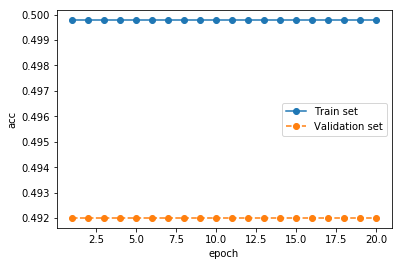

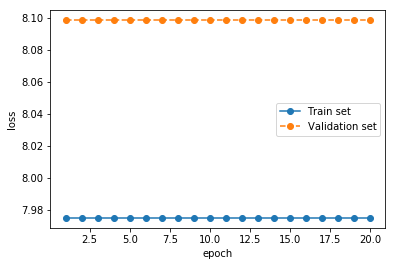

In [81]:
plot_training_summary(history,time_summary)
#scores = model.evaluate(test_data, y_test, verbose=0)
#print("Accuracy for glove model: %.2f%%" % (scores[1]*100))

# next_model

In [ ]:
from keras.constraints import maxnorm
from keras.engine import Input
from keras.engine import Model
from keras.layers import Dropout, Dense, Bidirectional, LSTM, \
    Embedding, GaussianNoise, Activation, Flatten, \
    RepeatVector, MaxoutDense, GlobalMaxPooling1D, \
    Convolution1D, MaxPooling1D, concatenate, Conv1D
from keras.models import Sequential
from keras.optimizers import Adam
from keras.regularizers import l2
from kutilities.layers import AttentionWithContext, Attention, MeanOverTime
from sklearn import preprocessing




def cnn_multi_filters(wv, sent_length, nfilters, nb_filters, **kwargs):
    noise = kwargs.get("noise", 0)
    trainable = kwargs.get("trainable", False)
    drop_text_input = kwargs.get("drop_text_input", 0.)
    drop_conv = kwargs.get("drop_conv", 0.)
    activity_l2 = kwargs.get("activity_l2", 0.)

    input_text = Input(shape=(sent_length,), dtype='int32')

    emb_text = embeddings_layer(max_length=sent_length, embeddings=wv,
                                trainable=trainable, masking=False)(input_text)
    emb_text = GaussianNoise(noise)(emb_text)
    emb_text = Dropout(drop_text_input)(emb_text)

    pooling_reps = []
    for i in nfilters:
        feat_maps = Convolution1D(nb_filter=nb_filters,
                                  filter_length=i,
                                  border_mode="valid",
                                  activation="relu",
                                  subsample_length=1)(emb_text)
        pool_vecs = MaxPooling1D(pool_length=2)(feat_maps)
        pool_vecs = Flatten()(pool_vecs)
        # pool_vecs = GlobalMaxPooling1D()(feat_maps)
        pooling_reps.append(pool_vecs)

    representation = concatenate(pooling_reps)

    representation = Dropout(drop_conv)(representation)

    probabilities = Dense(2, activation='softmax',
                          activity_regularizer=l2(activity_l2))(representation)

    model = Model(input=input_text, output=probabilities)
    model.compile(optimizer="adam", loss='categorical_crossentropy')

    return model

In [ ]:
%%time

set_verbosity(ERROR)
epochs = 200

monitor = EarlyStopping(monitor='vall_loss',min_delta=1e-3,verbose=0, mode='atuo')
checkpoint = ModelCheckpoint(filepath='wieght_save/best_weights_(price_label_of_model_one).hdf5',verbose=0,save_best_only=True)
time_summary = TimeSummary()
estimetor = Estimate_fasterD(epochs)

model_cnn = cnn_multi_filters(wv, sent_length, nfilters, nb_filters, **kwargs)
history = model_cnn.fit(train_data,y_train, batch_size=40 , 
                    validation_split=0.20, verbose=0, epochs=epochs,
                    callbacks=[monitor,checkpoint,time_summary,estimetor])


model.load_weights('wieght_save/best_weights_(price_label_of_model_one).hdf5') 